In [2]:
import numpy as np

In [3]:
from sklearn.datasets import make_moons

In [4]:
data,target=make_moons(400,noise=0.2)

In [5]:
import matplotlib.pyplot as plt

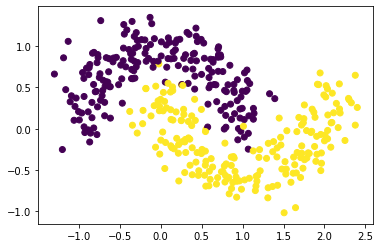

In [6]:
plt.scatter(data[:,0],data[:,1],c=target)

In [7]:
def predict(data,model):
    wh,bh,wout,bout=model['wh'],model['bh'],model['wout'],model['bout']
    f1=np.dot(data,wh)+bh
    a1=np.tanh(f1)
    f2=np.dot(f1,wout)+bout
    exp=np.exp(f2)
    output=exp/np.sum(exp,keepdims=True,axis=1)
    
    pred=np.argmax(output)
    return output

In [8]:
def build_model(input_n,hidden_n,output_n):
    wh=np.random.uniform(size=(input_n,hidden_n))
    bh=np.random.uniform(size=(1,hidden_n))
    wout=np.random.uniform(size=(hidden_n,output_n))
    bout=np.random.uniform(size=(1,output_n))
    
    for i in range(epochs):
        
        f1=np.dot(data,wh)+bh
        a1=np.tanh(f1)
        f2=np.dot(f1,wout)+bout
        exp=np.exp(f2)
        output=exp/(np.sum(exp, keepdims=True, axis=1))
        
        delta_o=output
        delta_o[range(n),target] -= 1
        
        error_h=np.dot(delta_o,wout.T)
        slope_h=1-np.power(a1,2)
        delta_h=error_h*slope_h
        
        wout+=np.dot(a1.T,delta_o) * (-alpha)
        bout+=np.sum(delta_o, axis=0, keepdims=True) * (-alpha)
        wh+=np.dot(data.T,delta_h) * (-alpha)
        bh+=np.sum(delta_h, axis=0, keepdims=True) * (-alpha)

        model={'wh':wh,'bh':bh,'wout':wout,'bout':bout}
    return model

In [9]:
input_n=data.shape[1]
hidden_n=3
output_n=2
alpha=0.0001
epochs=10000
n=data.shape[0]

In [10]:
model=build_model(input_n,hidden_n,output_n)

In [11]:
pred_y=predict(data,model)

In [12]:
pred_y[:3]

array([[0.95048624, 0.04951376],
       [0.98066104, 0.01933896],
       [0.68513821, 0.31486179]])

In [13]:
y_pred=np.argmax(pred_y,axis=1)


In [14]:
y_pred

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(target,y_pred)

0.8425